In [1]:

# Get the interactive Tools for Matplotlib
%matplotlib inline

from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy.stats import entropy
import torch


In [2]:

from data_loading import Vocabulary
from word_analyser_model import WordVectors


In [3]:

DATASET_VERSION = 'ca-100'
CBOW_VOCABULARY_ROOT = f'./data/text-preprocessing/data/{DATASET_VERSION}'
CBOW_VECTORS_ROOT = f'./model_parameters/{DATASET_VERSION}'

plt.rcParams['figure.figsize'] = [9.5, 6]


In [4]:

dict_ = f'{CBOW_VOCABULARY_ROOT}/ca.wiki.train.tokens.nopunct.dic'
counter = pickle.load(open(dict_, 'rb'))
words, values = zip(*counter.most_common(5000))

print('Most frequent Catalan words')
print(words[:10])
print(values[:10])


Most frequent Catalan words
('de', 'la', 'i', 'a', 'el', 'd', 'l', 'que', 'en', 'va')
(5029788, 2771563, 2495802, 2130330, 1704858, 1362665, 1322822, 1293716, 1266356, 1191615)


In [5]:

h = entropy(values)

print(f'Word entropy: {h:5.2f}, Perplexity: {np.exp(h):5.0f}')
print(f'Probability of the most frequent word: {values[0]/sum(values):2.3f}')


Word entropy:  6.22, Perplexity:   505
Probability of the most frequent word: 0.076


---
\
\
Zipf's law of words. Zipf's law was originally formulated in terms of quantitative linguistics, stating that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table.


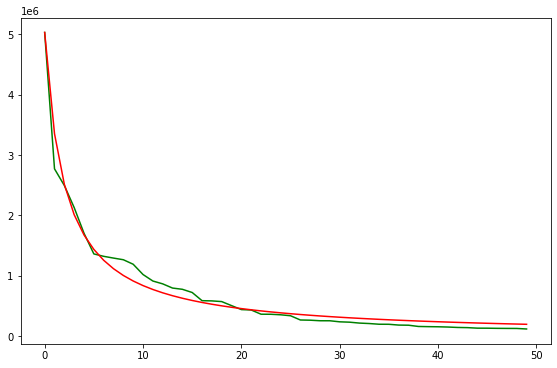

In [6]:

_ = plt.plot(values[:50], 'g', 2*values[0]/np.arange(2,52), 'r')


---
\
\
Benford's law, also called the Newcomb–Benford law, the law of anomalous numbers, or the first-digit law, is an observation about the frequency distribution of leading digits in many real-life sets of numerical data.

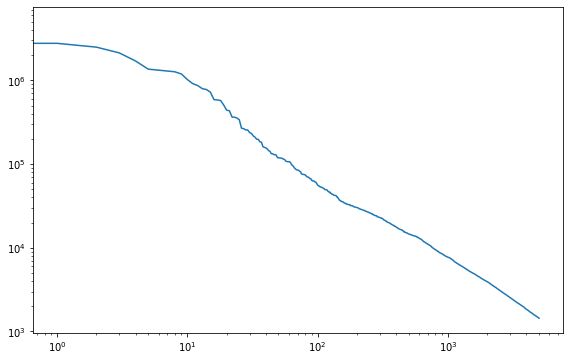

In [7]:
_ = plt.loglog(values)
plt.show()

Counter({1: 1705, 2: 1332, 3: 673, 4: 450, 5: 283, 6: 192, 7: 157, 8: 126, 9: 82})


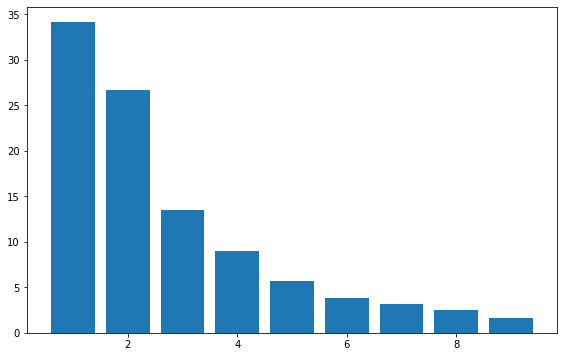

In [8]:

benford = Counter(int(str(item[1])[0]) for item in counter.most_common(5000))

print(benford)

percentage = np.array(list(benford.values()), dtype=float)
percentage /= percentage.sum()

_ = plt.bar(list(benford.keys()), percentage*100)



---


In [9]:

modelname = f'{CBOW_VECTORS_ROOT}/{DATASET_VERSION}.pt'
state_dict = torch.load(modelname, map_location=torch.device('cpu'))


In [10]:

state_dict.keys()


odict_keys(['weights', 'emb.weight', 'lin.weight'])

In [11]:

input_word_vectors = state_dict['emb.weight'].numpy()
input_word_vectors.shape


(100002, 460)

In [12]:

output_word_vectors = state_dict['lin.weight'].numpy()
output_word_vectors.shape


(100002, 460)

In [13]:

token_vocab = Vocabulary()
token_vocab.load(f'{CBOW_VOCABULARY_ROOT}/ca.wiki.vocab')


In [14]:

model1 = WordVectors(input_word_vectors, token_vocab)
model2 = WordVectors(output_word_vectors, token_vocab)


---

In [15]:

print("---- INPUT  EMBEDDING ----")

print("\ncatalà is similar to: ")
print( model1.most_similar('català') )
print("\nFrança is to francès as Polònia is to: ")
print( model1.analogy('França', 'francès', 'Polònia', keep_all=True))
print("\nFrança is to francès as Polònia is to: ")
print( model1.analogy('França', 'francès', 'Polònia', keep_all=False))


---- INPUT  EMBEDDING ----

català is similar to: 
[('gallec', 0.5537911), ('neerlandès', 0.5523325), ('valencià', 0.54412246), ('basc', 0.53228), ('romanès', 0.5235755), ('polonès', 0.52101326), ('rus', 0.5196935), ('japonès', 0.5189993), ('txec', 0.51278085), ('mallorquí', 0.51225483)]

França is to francès as Polònia is to: 
[('francès', 0.79003793), ('polonès', 0.40384918), ('alemany', 0.3997763), ('basc', 0.3947901), ('suec', 0.39255962)]

França is to francès as Polònia is to: 
[('basc', 0.3947901), ('suec', 0.39255962), ('txec', 0.3837213), ('neerlandès', 0.38334912), ('portuguès', 0.3779616)]


In [16]:

print("---- OUTPUT EMBEDDING ----")

print("\ncatalà is similar to: ")
print( model2.most_similar('català') )
print("\nFrança is to francès as Polònia is to: ")
print( model2.analogy('França', 'francès', 'Polònia', keep_all=True))
print("\nFrança is to francès as Polònia is to: ")
print( model2.analogy('França', 'francès', 'Polònia', keep_all=False))


---- OUTPUT EMBEDDING ----

català is similar to: 
[('general', 0.81707), ('clàssic', 0.81034666), ('independent', 0.79617316), ('irlandès', 0.78190213), ('armeni', 0.7793998), ('diari', 0.7789824), ('1923', 0.7709277), ('cinema', 0.7704441), ('modern', 0.76598626), ('menor', 0.76580405)]

França is to francès as Polònia is to: 
[('francès', 0.7656269), ('japonès', 0.6386996), ('portuguès', 0.631947), ('Temple', 0.631802), ('2019', 0.61746407)]

França is to francès as Polònia is to: 
[('Temple', 0.631802), ('2019', 0.61746407), ('georgià', 0.6145779), ('Polònia', 0.614242), ('basc', 0.60654444)]
